# EDA & 데이터 정제

## 데이터 확인

### 1) 데이터 불러오기

In [3]:
!git clone https://github.com/sangsucki/DataDrivenReport.git

Cloning into 'DataDrivenReport'...


In [3]:
import pandas as pd

df = pd.read_csv("C:/Users/katenam/DataDrivenReport/car.csv")
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### 2) 데이터 사전 이해하기
- #### 데이터 확보시 가장 먼저 확인해야하는 사항은 각 변수(열)에 어떤 것이 있는지 확인하는 것이다. 
- #### 일반적으로 데이터에는 데이터 사전 (data dictionary)이 함께 제공된다. 
- #### 데이터 사전은 데이터가 어디에서 왔는지, 어떻게 수집되었는지, 변수가 어떻게 정의되는지를 이해하는 데 결정적인 역할을 한다. 
- #### 데이터에 대해 충분히 이해한다는 것은 데이터의 도메인 지식을 확보해서 데이터로 표시된 숫자들이 각각 어떤 의미인지를 이해한다는 것이다.

### 2-1) car.csv 데이터 알아보기
- #### The data come from the Kaggle dataset Car Features and MSRP of Kaggle. It describes almost 12,000 car models sold in the USA between 1990 and 2018 with price (new or used) and some features. This study aims at performing some data manipulations and define a statistical model to predict the price of a car.
- ##### make: 제조사
- ##### model: 자동차 모델명
- ##### year: 자동차 연식
- ##### engine fuel type: 연료 유형
- ##### engine hp: 엔진 마력
- ##### engine cylinders: 엔진 실린더(단위: 기통)
- ##### transmission type: 변속기 유형
- ##### driven_wheels: 구동 휠
- ##### number of doors: 도어 수
- ##### market category: 시장 카테고리
- ##### vehicle size: 차량 크기
- ##### vehicle style: 차량 유형
- ##### highway MPG: 고속도고 연비
- ##### city mpg: 도시 연비
- ##### popularity: 인기도
- ##### city mpg: 도시 연비
- ##### MSRP: 제조사 권장 소비자 가격

In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

### 3) 데이터 유형 확인하기
- #### object: 문자열 또는 혼합된 데이터 타입을 가지고 있는 열
- #### int: 정수 데이터 타입을 가지고 있는 열
- #### float: 부동 소수점 숫자 데이터 타입을 가지고 있는 열

In [5]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## 데이터 정제

### 1) 사용하지 않는 열 삭제하기 
- #### 분석 목적이 명확하다면 사용하지 않는 열을 삭제해두는 것이 분석할 때 도움이 된다. 
- #### Engine Fuel Type, Market Category, Vehicle Style, Popularity, Number of Doors, Vehicle Size는 분석에 의미가 없다고 가정하고 삭제해보자.

In [6]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis = 1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### 2) 열 이름 변경하기
- #### 가능하면 열 이름 사이에 공백이 없도록 정리해준다. 공백이 필요하면 '_' 추가해준다. (공백이 있으면 파이썬 인식 오류 날 가능성 있음)

In [7]:
df = df.rename(columns = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", 
                          "Driven_Wheels": "Drive Mode", "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### 3) 중복 행 삭제하기
- #### 데이터셋의 행과 열의 크기와 중복된 행을 확인하고 삭제하자.

In [8]:
df.shape

(11914, 10)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


- #### 989개의 중복된 행이 확인되었다. 
- #### drop_duplicates 함수로 989개의 행을 삭제한다.

In [10]:
df = df.drop_duplicates()
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [11]:
df.shape

(10925, 10)

In [12]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

### 4) 결측치 처리하기
- #### 결측치를 제일 잘 처리하는 방법은 데이터를 가장 잘 이해하는 실무자의 도메인 지식과 경험에 따라 결정하는 것이 가장 좋다.
- #### 일반적으로 다음과 같은 방법을 사용한다.
 ##### a. 해당 행 삭제
 ##### b. 해당 열 삭제
 ##### c. 단순대치법: 수치혀인 경우 0 혹은 평균이나 중앙값으로 대체하고, 범주형인 경우 그룹별 최빈값을 사용한다.
 ##### d. 하나의 행 중 결측치가 여러 개인 경우: 결측치가 한 행에서 n개 이상이면 삭제하는 기준을 만들 수 있다.
 ##### e. KNN 보간법: 결측치가 있는 데이터 포인트와 가장 가까운 이웃들을 사용하여 결측치를 추정한다.

In [13]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


- #### 위의 결과 주어진 데이터셋의 경우 1만 개의 값에 비해 결측치가 100개(1%)에 가깝기 떄문에 이는 무시할 수 있는 작은 숫자이므로 삭제한다.

In [14]:
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

### 5) 이상치 처리하기
- ##### 박스 플롯(box plot)을 사용하는 시각화를 통해 이상치를 확인한다.
- ##### 박스 플롯의 위와 아래에 그려진 선을 상자 밖으로 뻗어나가는 부분은 상자의 위와 아래에서 1.5배 이상 벗어난 값을 이상치로 간주한다.

<AxesSubplot:xlabel='Price'>

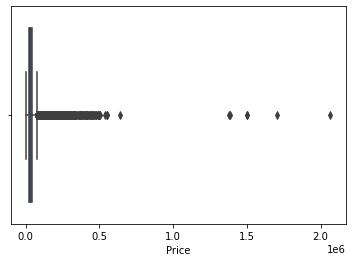

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.boxplot(x = df['Price']) # x= 이라고 하면 가로형으로 시각화 된다.

<AxesSubplot:ylabel='HP'>

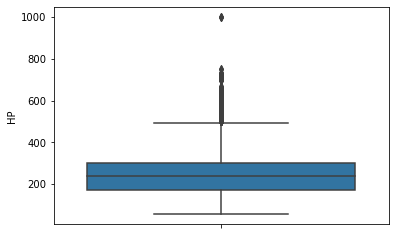

In [21]:
sns.boxplot(y = df['HP']) # y= 이라고 하면 세로형으로 시각화 된다.

<AxesSubplot:xlabel='Cylinders'>

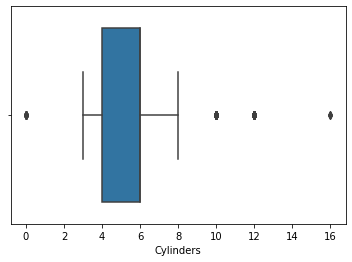

In [16]:
sns.boxplot(x = df['Cylinders'])

In [17]:
Q1 = df.quantile(0.25, numeric_only = True)
Q3 = df.quantile(0.75, numeric_only = True)
IQR = Q3 - Q1
print(IQR)
df, IQR = df.align(IQR, axis=1) # align 함수는 df변수와 IQR 변수의 열(axis=1)을 따라 정렬하여 이후 발생하는 연산 열 간의 오류를 방지한다.
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)] 
# x=1은 열 방향이고 x=0은 행 방향이다. 
# ' ~ '을 사용함으로써 이상치가 아닌 값만 가져오게 되는것이다. 
df.shape


Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


(9191, 10)

- #### 위의 결과에서 가장 마지막 줄을 보면 9191개의 행이 남은 것을 볼 수 있는데, 총 10925개 중 1734개의 행이 이상치였던 것을 알 수 있다.

## 변수 분포 확인

### 1) 종속변수 분포 확인하기
- #### 위에서 데이터에 대해 설명한바와 같이 이 프로젝트의 목표는 자동차 가격을 예측하는 것이기에 종속변수는 'Price'이다.

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

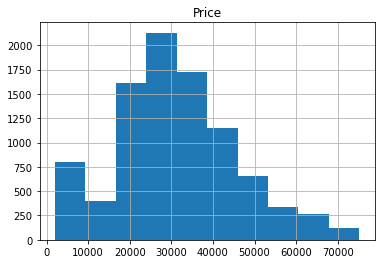

In [18]:
df.hist(column = 'Price')

### 2) 단일 독립변수 분포 확인하기

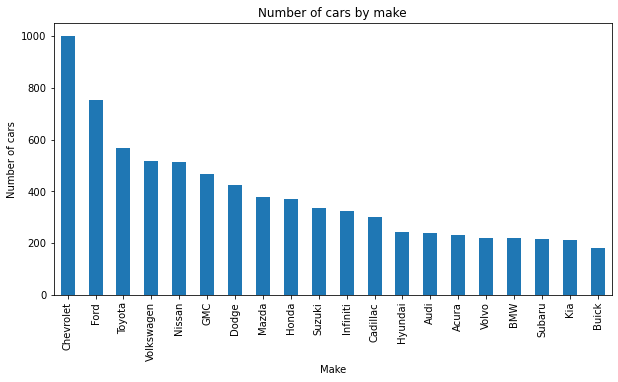

In [19]:
df['Make'].value_counts().nlargest(20).plot(kind='bar', figsize = (10,5)) # nlargest(20): 가장 빈도가 높은 상위 20개의 값을 추출한다.
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')
plt.show()

In [20]:
df['Make'].nunique()

38

### 3) 종속변수와 독립변수 관계 확인하기
- #### 일반적으로 산점도(scatter plot)를 사용하여 두 변수 간의 상관관계를 찾는다. 
- #### 마력(HP)과 가격(Price) 사이에 분산형 차트를 그려보자 

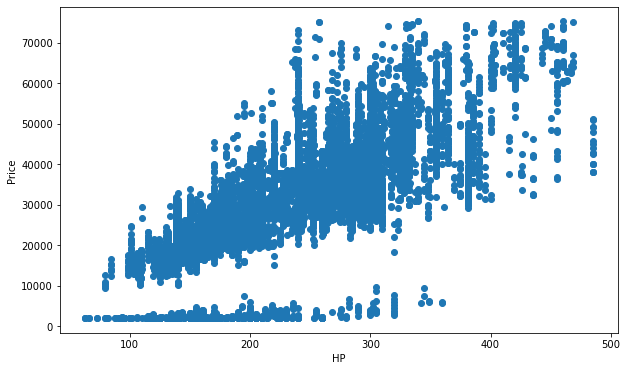

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

- #### 여러 변수 간의 관계를 찾는 가장 좋은 방법 중 하나는 히트맵(heatmap)을 사용하는 것이다. 

,Cylinders,HP,MPG-C,MPG-H,Price,Year
Cylinders,1.000000,0.715237,-0.755540,-0.703856,0.354013,-0.133920
HP,0.715237,1.000000,-0.544551,-0.443807,0.739042,0.326726
MPG-C,-0.755540,-0.544551,1.000000,0.939141,-0.180515,0.338145
MPG-H,-0.703856,-0.443807,0.939141,1.000000,-0.106320,0.378479
Price,0.354013,0.739042,-0.180515,-0.106320,1.000000,0.592983
Year,-0.133920,0.326726,0.338145,0.378479,0.592983,1.000000


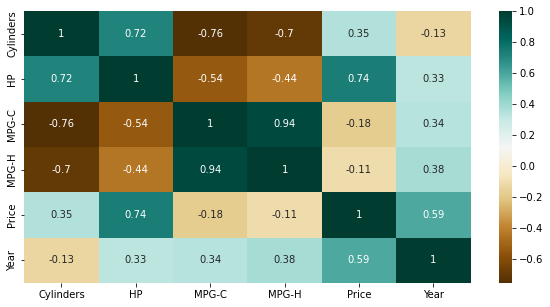

In [22]:
plt.figure(figsize=(10,5))
c= df.corr(numeric_only=True)
sns.heatmap(c,cmap="BrBG",annot=True) # annot는 값 표시 여부를 결정한다.
c

- #### 위의 히트맵에서 종속변수인 가격(Price) 변수는 주로 마력(HP), 엔진 크기(Cylinder), 및 연식(year)에 따라 달라지는 것을 알 수 있다.